In [ ]:
from google.colab import drive
 
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor


In [ ]:
df = pd.read_csv('/content/gdrive/My Drive/zomato.csv')
df.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          51717 non-null  object
 1   address                      51717 non-null  object
 2   name                         51717 non-null  object
 3   online_order                 51717 non-null  object
 4   book_table                   51717 non-null  object
 5   rate                         43942 non-null  object
 6   votes                        51717 non-null  int64 
 7   phone                        50509 non-null  object
 8   location                     51696 non-null  object
 9   rest_type                    51490 non-null  object
 10  dish_liked                   23639 non-null  object
 11  cuisines                     51672 non-null  object
 12  approx_cost(for two people)  51371 non-null  object
 13  reviews_list                 51

In [ ]:
df.rename(columns = {'rate':'rating'},inplace=True)

In [ ]:
df.drop(['url','dish_liked','phone','reviews_list'],axis=1,inplace=True)

In [ ]:
df.duplicated().sum()
df.drop_duplicates(inplace = True)

In [ ]:
df.isnull().sum()
df.dropna(how = 'any',inplace=True)
df.info()
  

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43477 entries, 0 to 51716
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   address                      43477 non-null  object
 1   name                         43477 non-null  object
 2   online_order                 43477 non-null  object
 3   book_table                   43477 non-null  object
 4   rating                       43477 non-null  object
 5   votes                        43477 non-null  int64 
 6   location                     43477 non-null  object
 7   rest_type                    43477 non-null  object
 8   cuisines                     43477 non-null  object
 9   approx_cost(for two people)  43477 non-null  object
 10  menu_item                    43477 non-null  object
 11  listed_in(type)              43477 non-null  object
 12  listed_in(city)              43477 non-null  object
dtypes: int64(1), object(12)
memory 

In [ ]:
df.rename(columns = {'listed_in(type)':'type','listed_in(city)':'city'},inplace=True)

In [ ]:
df.columns

Index(['address', 'name', 'online_order', 'book_table', 'rating', 'votes',
       'location', 'rest_type', 'cuisines', 'approx_cost(for two people)',
       'menu_item', 'type', 'city'],
      dtype='object')

In [ ]:
df.rename(columns = {'approx_cost(for two people)':'cost'},inplace=True)

In [ ]:
df.columns

Index(['address', 'name', 'online_order', 'book_table', 'rating', 'votes',
       'location', 'rest_type', 'cuisines', 'cost', 'menu_item', 'type',
       'city'],
      dtype='object')

In [ ]:
df['cost'] = df['cost'].astype(str)
df['cost'] = df['cost'].apply(lambda x:x.replace(',','.'))
df['cost'] = df['cost'].astype(float)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43477 entries, 0 to 51716
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   address       43477 non-null  object 
 1   name          43477 non-null  object 
 2   online_order  43477 non-null  object 
 3   book_table    43477 non-null  object 
 4   rating        43477 non-null  object 
 5   votes         43477 non-null  int64  
 6   location      43477 non-null  object 
 7   rest_type     43477 non-null  object 
 8   cuisines      43477 non-null  object 
 9   cost          43477 non-null  float64
 10  menu_item     43477 non-null  object 
 11  type          43477 non-null  object 
 12  city          43477 non-null  object 
dtypes: float64(1), int64(1), object(11)
memory usage: 4.6+ MB


In [ ]:
df['rating'].unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [ ]:
df = df.loc[df.rating != 'NEW']
df = df.loc[df.rating != '-']
clean_slash = lambda x: x .replace('/5','') if type(x)==np.str else x
df.rating = df.rating.apply(clean_slash).str.strip().astype('float')
df['rating'].head()

0    4.1
1    4.1
2    3.8
3    3.7
4    3.8
Name: rating, dtype: float64

In [ ]:
df.name = df.name.apply(lambda x:x.title())
df.online_order.replace(('Yes','No'),(True,False),inplace = True)
df.book_table.replace(('Yes','No'),(True,False),inplace = True)
df.head(2)

,address,name,online_order,book_table,rating,votes,location,rest_type,cuisines,cost,menu_item,type,city
0,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,True,True,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800.0,[],Buffet,Banashankari
1,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,True,False,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800.0,[],Buffet,Banashankari


In [ ]:
def Encode(df):
  for col in df.columns[~df.columns.isin(['rating','cost','votes'])]:
    df[col] = df[col].factorize()[0]
  return df  

data_en = Encode(df.copy())

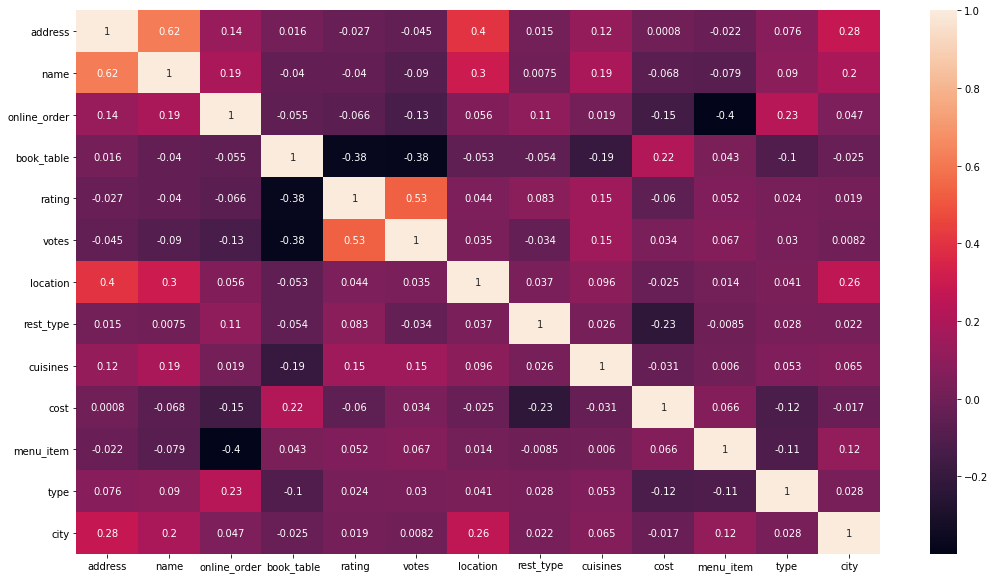

In [ ]:
plt.figure(figsize = (18,10))
corr = data_en.corr(method = 'kendall')
sn.heatmap(corr,annot=True)

In [ ]:
x = data_en.iloc[:,[2,3,5,6,7,8,9,11]]
y = data_en['rating']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.1,random_state=300)
x_train.head()
y_train.head()

44833    4.7
19250    3.2
17869    3.6
45389    3.8
29652    4.6
Name: rating, dtype: float64

In [ ]:
#compatiblity of Linear model
linear = LinearRegression()
linear.fit(x_train,y_train)
y_pred = linear.predict(x_test)
y_pred

array([3.49205375, 4.14637476, 3.65663465, ..., 3.69452082, 3.58832168,
       4.20589445])

In [ ]:
#Linear model variance(r2_score)
r2_score(y_test,y_pred)

#r2 score is very low means higah variance using linear regression 

0.2974480086200946

In [ ]:
#compatibility of decision tree
rforest = RandomForestRegressor(n_estimators=500,random_state=300,min_samples_leaf=.0001)
rforest.fit(x_train,y_train)
y_predict = rforest.predict(x_test)
y_predict

array([3.15110731, 4.05583562, 3.68816421, ..., 3.92591847, 3.38227335,
       4.30452081])

In [ ]:
#forest regressor r2 score
r2_score(y_test,y_predict)

# we can use forest regressor 

0.8910748148456709

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Location Count')

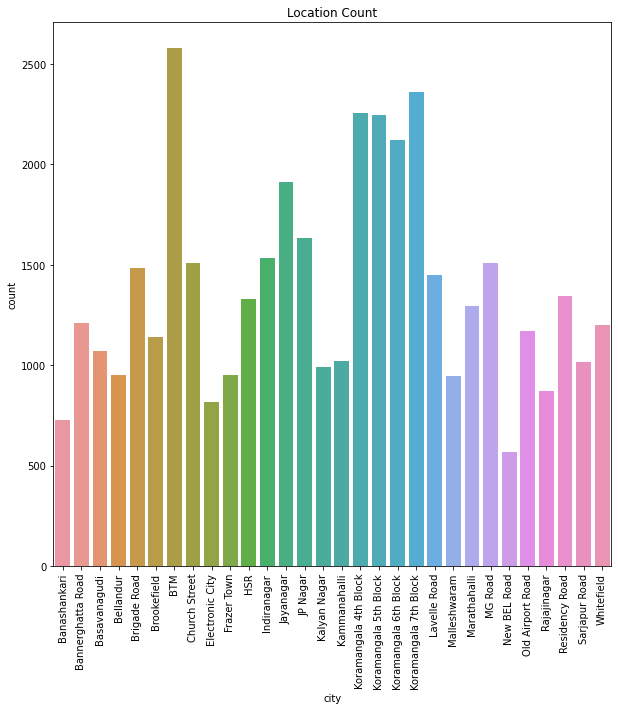

In [ ]:
sn.countplot(df['city'])
sn.countplot(df['city']).set_xticklabels(sn.countplot(df['city']).get_xticklabels(),rotation = 90)
plt.gcf().set_size_inches(10,10)
plt.title('Location Count')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Delivering Online or not')

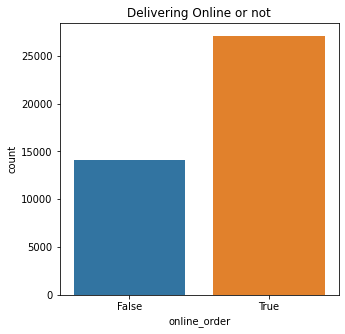

In [ ]:
sn.countplot(df['online_order'])
fig = plt.gcf()
fig.set_size_inches(5,5)
plt.title('Delivering Online or not')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Table Booking')

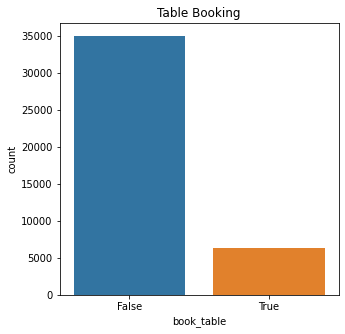

In [ ]:
sn.countplot(df['book_table'])
fig = plt.gcf()
fig.set_size_inches(5,5)
plt.title('Table Booking')

<function matplotlib.pyplot.show>

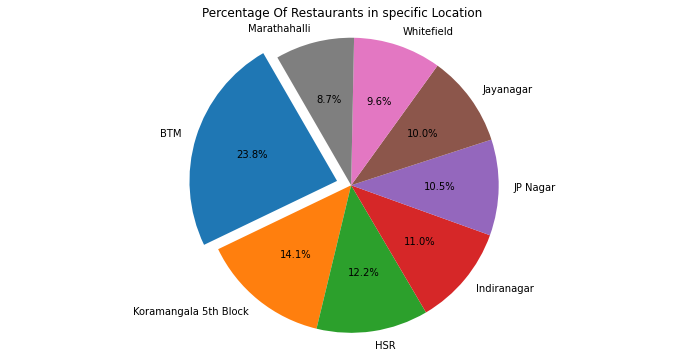

In [ ]:
plt.figure(figsize=(12,6))
name = df['location'].value_counts()[:8].index
value = df['location'].value_counts()[:8].values
explode = (0.1,0,0,0,0,0,0,0)
plt.pie(value,explode=explode,labels=name,autopct='%1.1f%%',startangle=120)
plt.axis('equal')
plt.title('Percentage Of Restaurants in specific Location')
plt.show

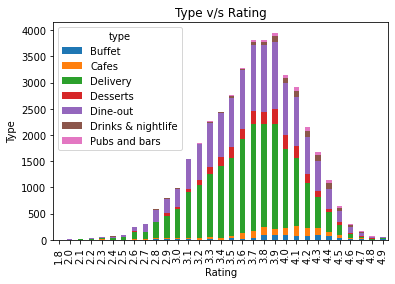

<Figure size 1080x1080 with 0 Axes>

In [ ]:
type_p = pd.crosstab(df['rating'],df['type']) 
type_p.plot(kind='bar',stacked=True);
plt.title('Type v/s Rating')
plt.xlabel('Rating')
plt.ylabel('Type')
plt.xticks(size=10)
plt.yticks(size=10)
plt.figure(figsize=(15,15))
plt.show()

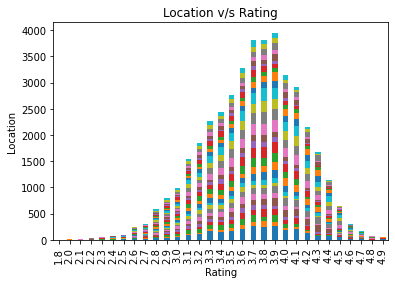

In [ ]:
type_pl = pd.crosstab(df['rating'],df['city'])
type_pl.plot(kind='bar',stacked=True)
plt.title('Location v/s Rating')
plt.xlabel('Rating')
plt.ylabel('Location')
plt.xticks(size = 10)
plt.legend().remove()


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Type of Dine in')

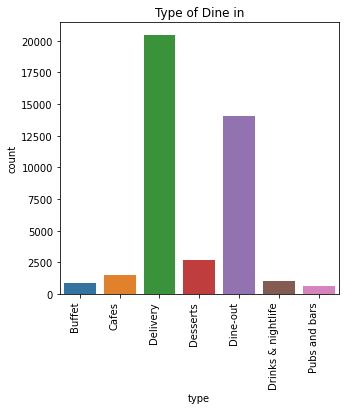

In [ ]:
sn.countplot(df['type'])
sn.countplot(df['type']).set_xticklabels(sn.countplot(df['type']).get_xticklabels(), rotation=90, ha="right")
fig = plt.gcf()
fig.set_size_inches(5,5)
plt.title('Type of Dine in')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62]),
 <a list of 63 Text major ticklabel objects>)

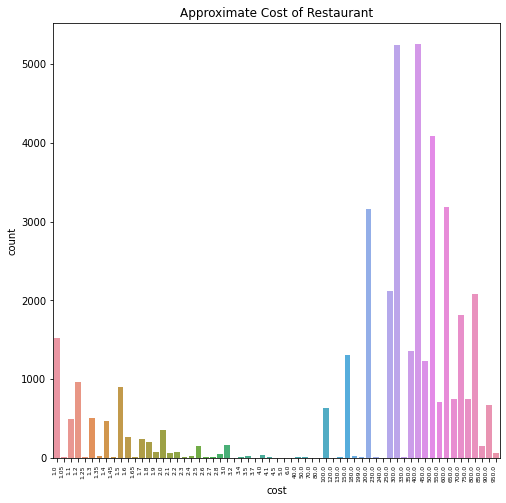

In [ ]:
sn.countplot(df['cost'])
sn.countplot(df['cost']).set_xticklabels(sn.countplot(df['cost']).get_xticklabels(), rotation=90, ha="right")
fig = plt.gcf()
fig.set_size_inches(8,8)
plt.title("Approximate Cost of Restaurant")
plt.xticks(size=6)